In [50]:
!pip install xlrd

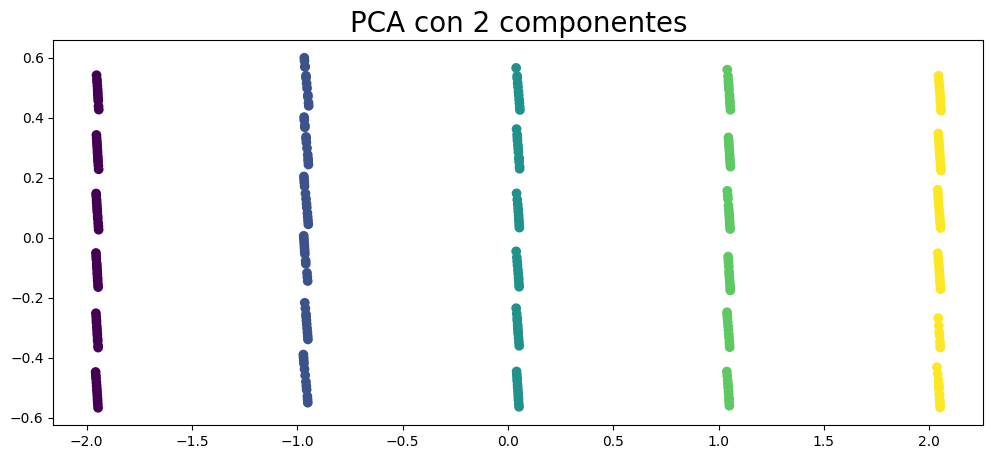

In [51]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

# Convert the NumPy array to a DataFrame with customized labels
data_pca = pd.read_csv('Datos_PCA.csv')

plt.figure(figsize=(12, 5))
plt.scatter(data_pca['Componente 1'], data_pca['Componente 2'], c=data_pca["Label"])

plt.title("PCA con 2 componentes", fontsize=20)
plt.show()


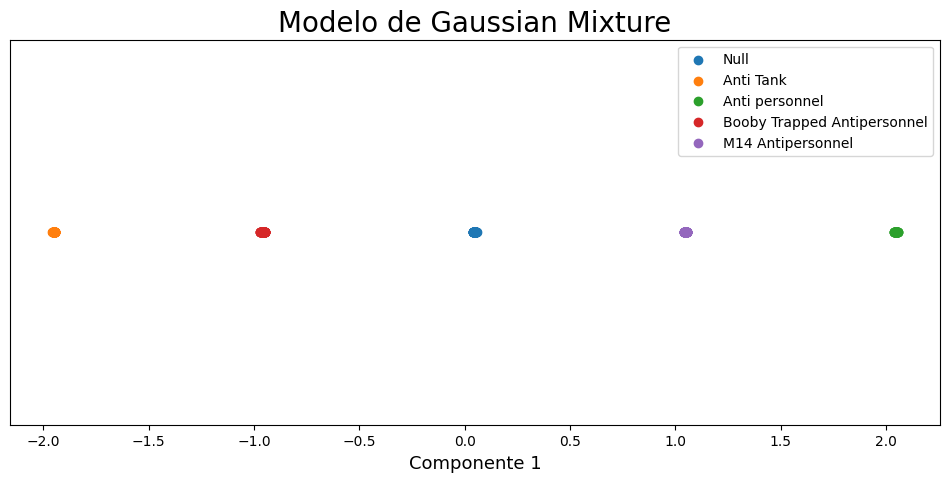

In [52]:
import pandas as pd
from sklearn.mixture import GaussianMixture
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

# Leer los datos desde el archivo CSV que ya tiene las componentes principales
data_pca = pd.read_csv('Datos_PCA.csv')
# Seleccionar solo la 'Componente 1' para el modelo de Gaussian Mixture
X = data_pca['Componente 1'].values.reshape(-1, 1)

# Inicializar el modelo de Gaussian Mixture con 5 componentes y ajustarlo a todos los datos
gmm = GaussianMixture(n_components=5, random_state=42)
gmm.fit(X)

# Predecir las etiquetas para todos los datos
labels = gmm.predict(X)

# Agregar las etiquetas al DataFrame original
data_pca['GMM Label'] = labels

# Nombres de las clases asociados con las etiquetas del GMM
class_names = ['Null', 'Anti Tank', 'Anti personnel', 'Booby Trapped Antipersonnel', 'M14 Antipersonnel']

# Crear un gráfico de dispersión con leyendas para cada clase
plt.figure(figsize=(12, 5))
scatter_handles = []  # Lista para almacenar los objetos de dispersión para cada clase

for i in range(len(class_names)):
    points = data_pca[data_pca['GMM Label'] == i]['Componente 1']
    handle = plt.scatter(points, np.zeros_like(points), label=class_names[i])
    scatter_handles.append(handle)

# Agregar leyenda para cada clase
plt.legend(handles=scatter_handles)

plt.title("Modelo de Gaussian Mixture", fontsize=20)
plt.xlabel("Componente 1", fontsize=13)
plt.yticks([])  # Ocultar los valores en el eje y
plt.show()


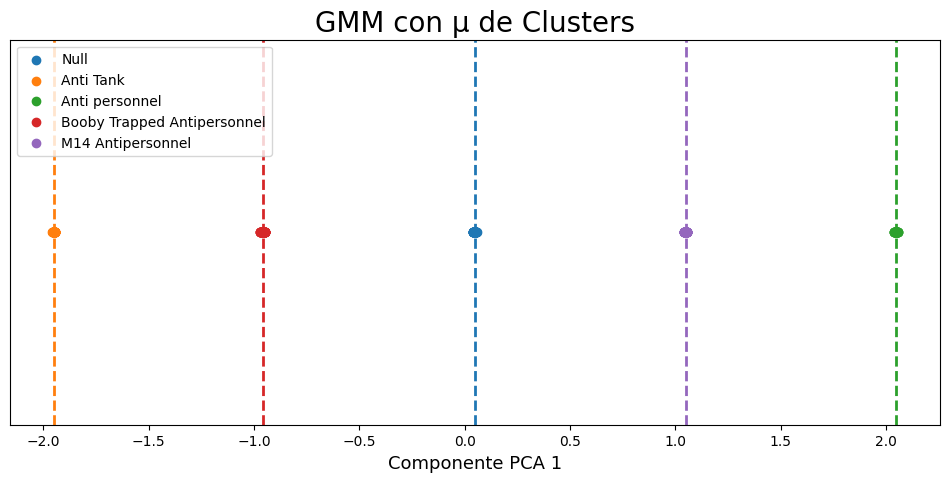

In [53]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.mixture import GaussianMixture

# Leer los datos desde el archivo CSV que ya tiene las componentes principales
data_pca = pd.read_csv('Datos_PCA.csv')
# Seleccionar solo la 'Componente 1' para el modelo de Gaussian Mixture
X = data_pca['Componente 1'].values.reshape(-1, 1)

# Inicializar el modelo de Gaussian Mixture con 5 componentes y ajustarlo a todos los datos
gmm = GaussianMixture(n_components=5, random_state=42)
gmm.fit(X)

# Predecir las etiquetas para todos los datos
labels = gmm.predict(X)

# Agregar las etiquetas al DataFrame original
data_pca['GMM Label'] = labels

# Nombres de las clases asociados con las etiquetas del GMM
class_names = ['Null', 'Anti Tank', 'Anti personnel', 'Booby Trapped Antipersonnel', 'M14 Antipersonnel']

# Crear un gráfico de dispersión con leyendas para cada clase
plt.figure(figsize=(12, 5))
scatter_handles = []  # Lista para almacenar los objetos de dispersión para cada clase

for i in range(len(class_names)):
    points = data_pca[data_pca['GMM Label'] == i]['Componente 1']
    handle = plt.scatter(points, np.zeros_like(points), label=class_names[i])
    scatter_handles.append(handle)

    # Dibujar líneas verticales en las medias de cada clase con el color correspondiente
    mean_value = gmm.means_[i][0]  # Obtener la media del cluster i
    plt.axvline(x=mean_value, color=handle.get_facecolor()[0], linestyle='--', linewidth=2, label=f'Mean Cluster {i}')

# # Agregar leyenda para las medias de cada clase
# plt.legend()
# Agregar leyenda para las medias de cada clase
plt.legend(scatter_handles, class_names, loc='upper left')  # Leyenda para las clasificaciones

plt.title("GMM con μ de Clusters", fontsize=20)
plt.xlabel("Componente PCA 1", fontsize=13)
plt.yticks([])  # Ocultar los valores en el eje y
plt.show()


     Componente 1  Componente 2  Label
0       -1.957353     -0.447865      1
1       -1.955246     -0.469494      1
2       -1.953698     -0.482494      1
3       -1.951330     -0.505277      1
4       -1.950593     -0.514694      1
..            ...           ...    ...
333      2.052363     -0.159241      5
334      2.045580      0.525602      5
335      2.050041      0.487416      5
336      2.052467      0.458210      5
337      2.056065      0.423834      5

[338 rows x 3 columns]
[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5]


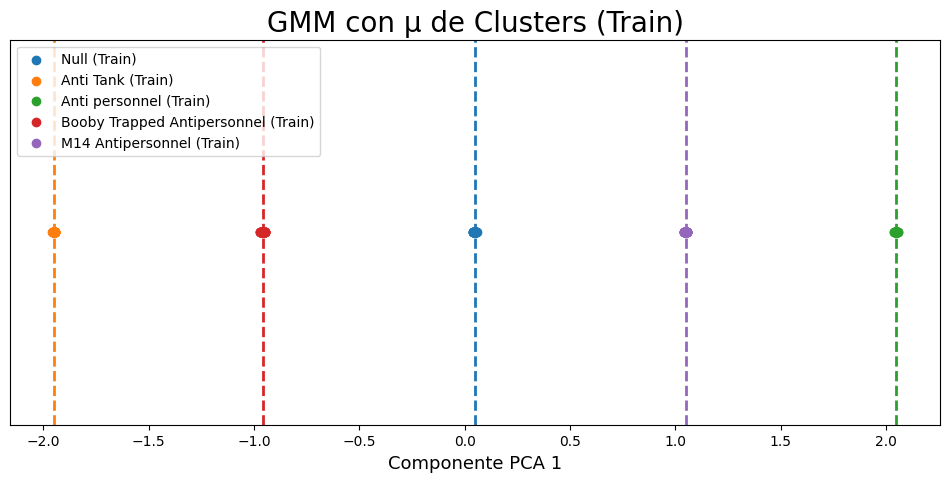

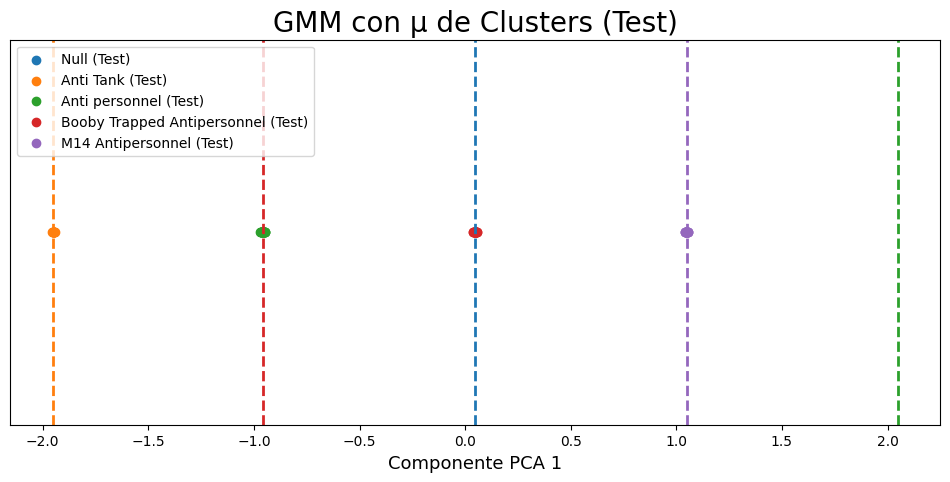

In [54]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.mixture import GaussianMixture

# Leer los datos desde el archivo CSV que ya tiene las componentes principales
data_pca = pd.read_csv('Datos_PCA.csv')
print(data_pca)
# Seleccionar solo la 'Componente 1' para el modelo de Gaussian Mixture
X = data_pca['Componente 1'].values.reshape(-1, 1)
# Dividir los datos en conjunto de entrenamiento (70%) y conjunto de prueba (30%)
train_size = int(0.7 * len(X))
X_train = X[:train_size]
X_test = X[train_size:]

Y = data_pca['Label'].values.reshape(-1, 1)
train_size = int(0.7 * len(Y))
Y_train = Y[:train_size]
Y_test = Y[train_size:]

# Inicializar el modelo de Gaussian Mixture con 5 componentes y ajustarlo al conjunto de entrenamiento
gmm = GaussianMixture(n_components=5, random_state=20)
gmm.fit(X_train)

# Predecir las etiquetas para el conjunto de entrenamiento
train_labels = gmm.predict(X_train)

# Predecir las etiquetas para el conjunto de prueba
test_labels = gmm.predict(X_test)

#Se realiza la correspondencia de un espacio a otro
# Los clusters tienen el número del cluster que da por defecto, se realiza el cambio a la clase original
nuevos_labels = [1 if label == 1 else
                2 if label == 3 else
                3 if label == 0 else
                4 if label == 4 else
                5 if label == 2 else
                label
                for label in test_labels]

test_labels=nuevos_labels

print(test_labels)
# Agregar las etiquetas al DataFrame original del conjunto de entrenamiento
data_train = data_pca.iloc[:train_size].copy()
data_train['GMM Label'] = train_labels

# Agregar las etiquetas al DataFrame original del conjunto de prueba
data_test = data_pca.iloc[train_size:].copy()
data_test['GMM Label'] = test_labels

# Nombres de las clases asociados con las etiquetas del GMM
class_names = ['Null', 'Anti Tank', 'Anti personnel', 'Booby Trapped Antipersonnel', 'M14 Antipersonnel']

# Crear un gráfico de dispersión para el conjunto de entrenamiento
plt.figure(figsize=(12, 5))
scatter_handles_train = []  # Lista para almacenar los objetos de dispersión para cada clase del conjunto de entrenamiento

for i in range(len(class_names)):
    points = data_train[data_train['GMM Label'] == i]['Componente 1']
    handle = plt.scatter(points, np.zeros_like(points), label=f'{class_names[i]} (Train)')
    scatter_handles_train.append(handle)

    # Dibujar líneas verticales en las medias de cada clase con el color correspondiente
    mean_value = gmm.means_[i][0]  # Obtener la media del cluster i
    plt.axvline(x=mean_value, color=handle.get_facecolor()[0], linestyle='--', linewidth=2)

# Crear un gráfico de dispersión para el conjunto de prueba
plt.figure(figsize=(12, 5))
scatter_handles_test = []  # Lista para almacenar los objetos de dispersión para cada clase del conjunto de prueba

for i in range(len(class_names)):
    points = data_test[data_test['GMM Label'] == i]['Componente 1']
    handle = plt.scatter(points, np.zeros_like(points), label=f'{class_names[i]} (Test)')
    scatter_handles_test.append(handle)

    # Dibujar líneas verticales en las medias de cada clase con el color correspondiente
    mean_value = gmm.means_[i][0]  # Obtener la media del cluster i
    plt.axvline(x=mean_value, color=handle.get_facecolor()[0], linestyle='--', linewidth=2)

# Agregar leyenda para las medias de cada clase en ambos gráficos
plt.figure(1)
plt.legend(scatter_handles_train, [f'{class_name} (Train)' for class_name in class_names], loc='upper left')
plt.title("GMM con μ de Clusters (Train)", fontsize=20)
plt.xlabel("Componente PCA 1", fontsize=13)
plt.yticks([])  # Ocultar los valores en el eje y

plt.figure(2)
plt.legend(scatter_handles_test, [f'{class_name} (Test)' for class_name in class_names], loc='upper left')
plt.title("GMM con μ de Clusters (Test)", fontsize=20)
plt.xlabel("Componente PCA 1", fontsize=13)
plt.yticks([])  # Ocultar los valores en el eje y

plt.show()

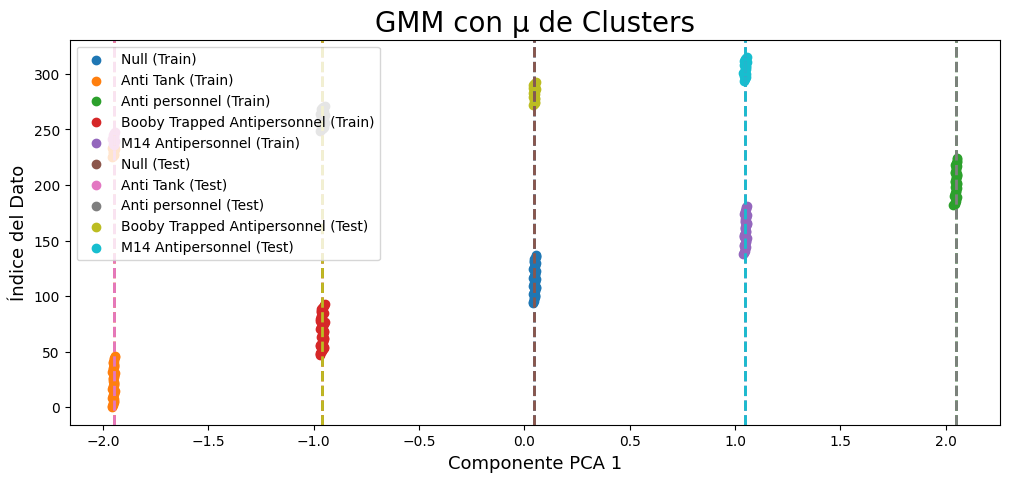

In [55]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.mixture import GaussianMixture

# Leer los datos desde el archivo CSV que ya tiene las componentes principales
data_pca = pd.read_csv('Datos_PCA.csv')
# Seleccionar solo la 'Componente 1' para el modelo de Gaussian Mixture
X = data_pca['Componente 1'].values.reshape(-1, 1)
y = data_pca['Label'].values.reshape(-1, 1)
# Dividir los datos en conjunto de entrenamiento (70%) y conjunto de prueba (30%)
train_size = int(0.7 * len(X))
X_train = X[:train_size]
X_test = X[train_size:]

y_train = y[:train_size]
y_test = y[train_size:]
# Inicializar el modelo de Gaussian Mixture con 5 componentes y ajustarlo al conjunto de entrenamiento
gmm = GaussianMixture(n_components=5, random_state=42)
gmm.fit(X_train)

# Predecir las etiquetas para el conjunto de entrenamiento
train_labels = gmm.predict(X_train)

# Predecir las etiquetas para el conjunto de prueba
test_labels = gmm.predict(X_test)

#Se realiza la correspondencia de un espacio a otro
# Los clusters tienen el número del cluster que da por defecto, se realiza el cambio a la clase original
nuevos_labels = [1 if label == 1 else
                2 if label == 3 else
                3 if label == 0 else
                4 if label == 4 else
                5 if label == 2 else
                label
                for label in test_labels]

test_labels=nuevos_labels


# Agregar las etiquetas al DataFrame original del conjunto de entrenamiento
data_train = data_pca.iloc[:train_size].copy()
data_train['GMM Label'] = train_labels

# Agregar las etiquetas al DataFrame original del conjunto de prueba
data_test = data_pca.iloc[train_size:].copy()
data_test['GMM Label'] = test_labels

# Nombres de las clases asociados con las etiquetas del GMM
class_names = ['Null', 'Anti Tank', 'Anti personnel', 'Booby Trapped Antipersonnel', 'M14 Antipersonnel']

# Crear gráficas de dispersión para ambos conjuntos (entrenamiento y prueba)
plt.figure(figsize=(12, 5))

# Gráfica para el conjunto de entrenamiento
scatter_handles_train = []
for i in range(len(class_names)):
    points_train = data_train[data_train['GMM Label'] == i]['Componente 1']
    indices_train = data_train[data_train['GMM Label'] == i].index
    handle_train = plt.scatter(points_train, indices_train, label=f'{class_names[i]} (Train)')
    scatter_handles_train.append(handle_train)
    mean_value_train = gmm.means_[i][0]
    plt.axvline(x=mean_value_train, color=handle_train.get_facecolor()[0], linestyle='--', linewidth=2)

# Gráfica para el conjunto de prueba
scatter_handles_test = []
for i in range(len(class_names)):
    points_test = data_test[data_test['GMM Label'] == i]['Componente 1']
    indices_test = data_test[data_test['GMM Label'] == i].index
    handle_test = plt.scatter(points_test, indices_test, label=f'{class_names[i]} (Test)')
    scatter_handles_test.append(handle_test)
    mean_value_test = gmm.means_[i][0]
    plt.axvline(x=mean_value_test, color=handle_test.get_facecolor()[0], linestyle='--', linewidth=2)

# Configurar las leyendas y títulos para ambas gráficas
plt.legend(scatter_handles_train + scatter_handles_test,
           [f'{class_name} (Train)' for class_name in class_names] + [f'{class_name} (Test)' for class_name in class_names],
           loc='upper left')
plt.title("GMM con μ de Clusters", fontsize=20)
plt.xlabel("Componente PCA 1", fontsize=13)
plt.ylabel("Índice del Dato", fontsize=13)
plt.show()


In [65]:
from sklearn.metrics import confusion_matrix #Matriz de confusión
from sklearn.metrics import accuracy_score # Para mirar el puntaje de precisión
from sklearn.metrics import recall_score # Sensibilidad
from sklearn.metrics import precision_score #Precisión


Matriz_confusion = confusion_matrix(test_labels,y_test)
print("Matriz de confusión:", Matriz_confusion)
# Imprimir precision
Accuracy= accuracy_score(test_labels,y_test)
print("Accuracy: ",Accuracy)


Matriz de confusión: [[13  0  0  0  0]
 [ 0 23  0  0  0]
 [ 0  0 22  0  0]
 [ 0  0  0 22  0]
 [ 0  0  0  0 22]]
Accuracy:  1.0
